<a href="https://colab.research.google.com/github/ilhamAdhim/PCVK_20_21/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Gamma Correction in images
---------------------------
Input gamma value: 3


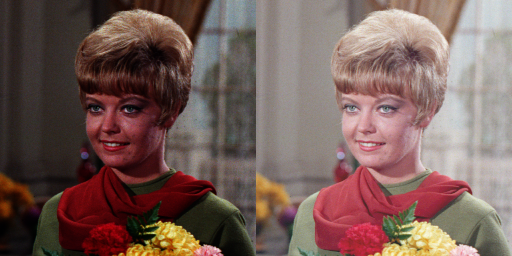

In [ ]:
print('Gamma Correction in images')
print('---------------------------')

try: 
  gamma = int(input('Input gamma value: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_img = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      correction = 255*((image[x,y,z]/255)** (1/gamma))
      gamma_img[x,y,z] = np.clip(correction, 0, 255)

frame = cv.hconcat((image, gamma_img))
cv2_imshow(frame)

Bit Depth: 
-----------
Insert Depth value: 1


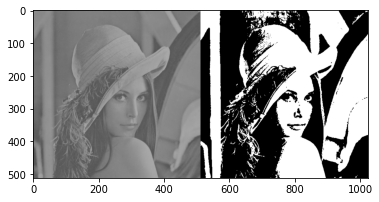

In [ ]:
print('Bit Depth: ')
print('-----------')

try:
  depth = int(input('Insert Depth value: '))
except ValueError:
  print('Error, not an number')

image = cv.imread('/content/drive/MyDrive/PCVK/lena_gs_lc.jpg')
depth_img = np.zeros(image.shape, image.dtype)

level = 255/((2**depth)-1)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      correction = round((image[x,y,z]/level))*level
      depth_img[x,y,z] = np.clip(correction, 0, 255)

frame = cv.hconcat((image, depth_img))
plt.imshow(frame)

In [46]:
import glob
import math

path = "/content/drive/MyDrive/PCVK/noises/*.jpg"
files = glob.glob(path)
files.sort()

def average_fn(n):
  temp = cv.imread(files[0])
  sum_arr = np.zeros(temp.shape).astype(np.float)
  for file in files[0:n]:
    img = cv.imread(file).astype(float)
    sum_arr = sum_arr + img

  denoised_img = sum_arr / n
  outputImg = cv.normalize(denoised_img, None, 0, 255, cv.NORM_MINMAX)
  return outputImg

def PSNR(img1, img2):
  mse = np.mean((img1-img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

PSNR(average_fn(10),cv.imread(files[0]))

23.070625916044072

image input: 


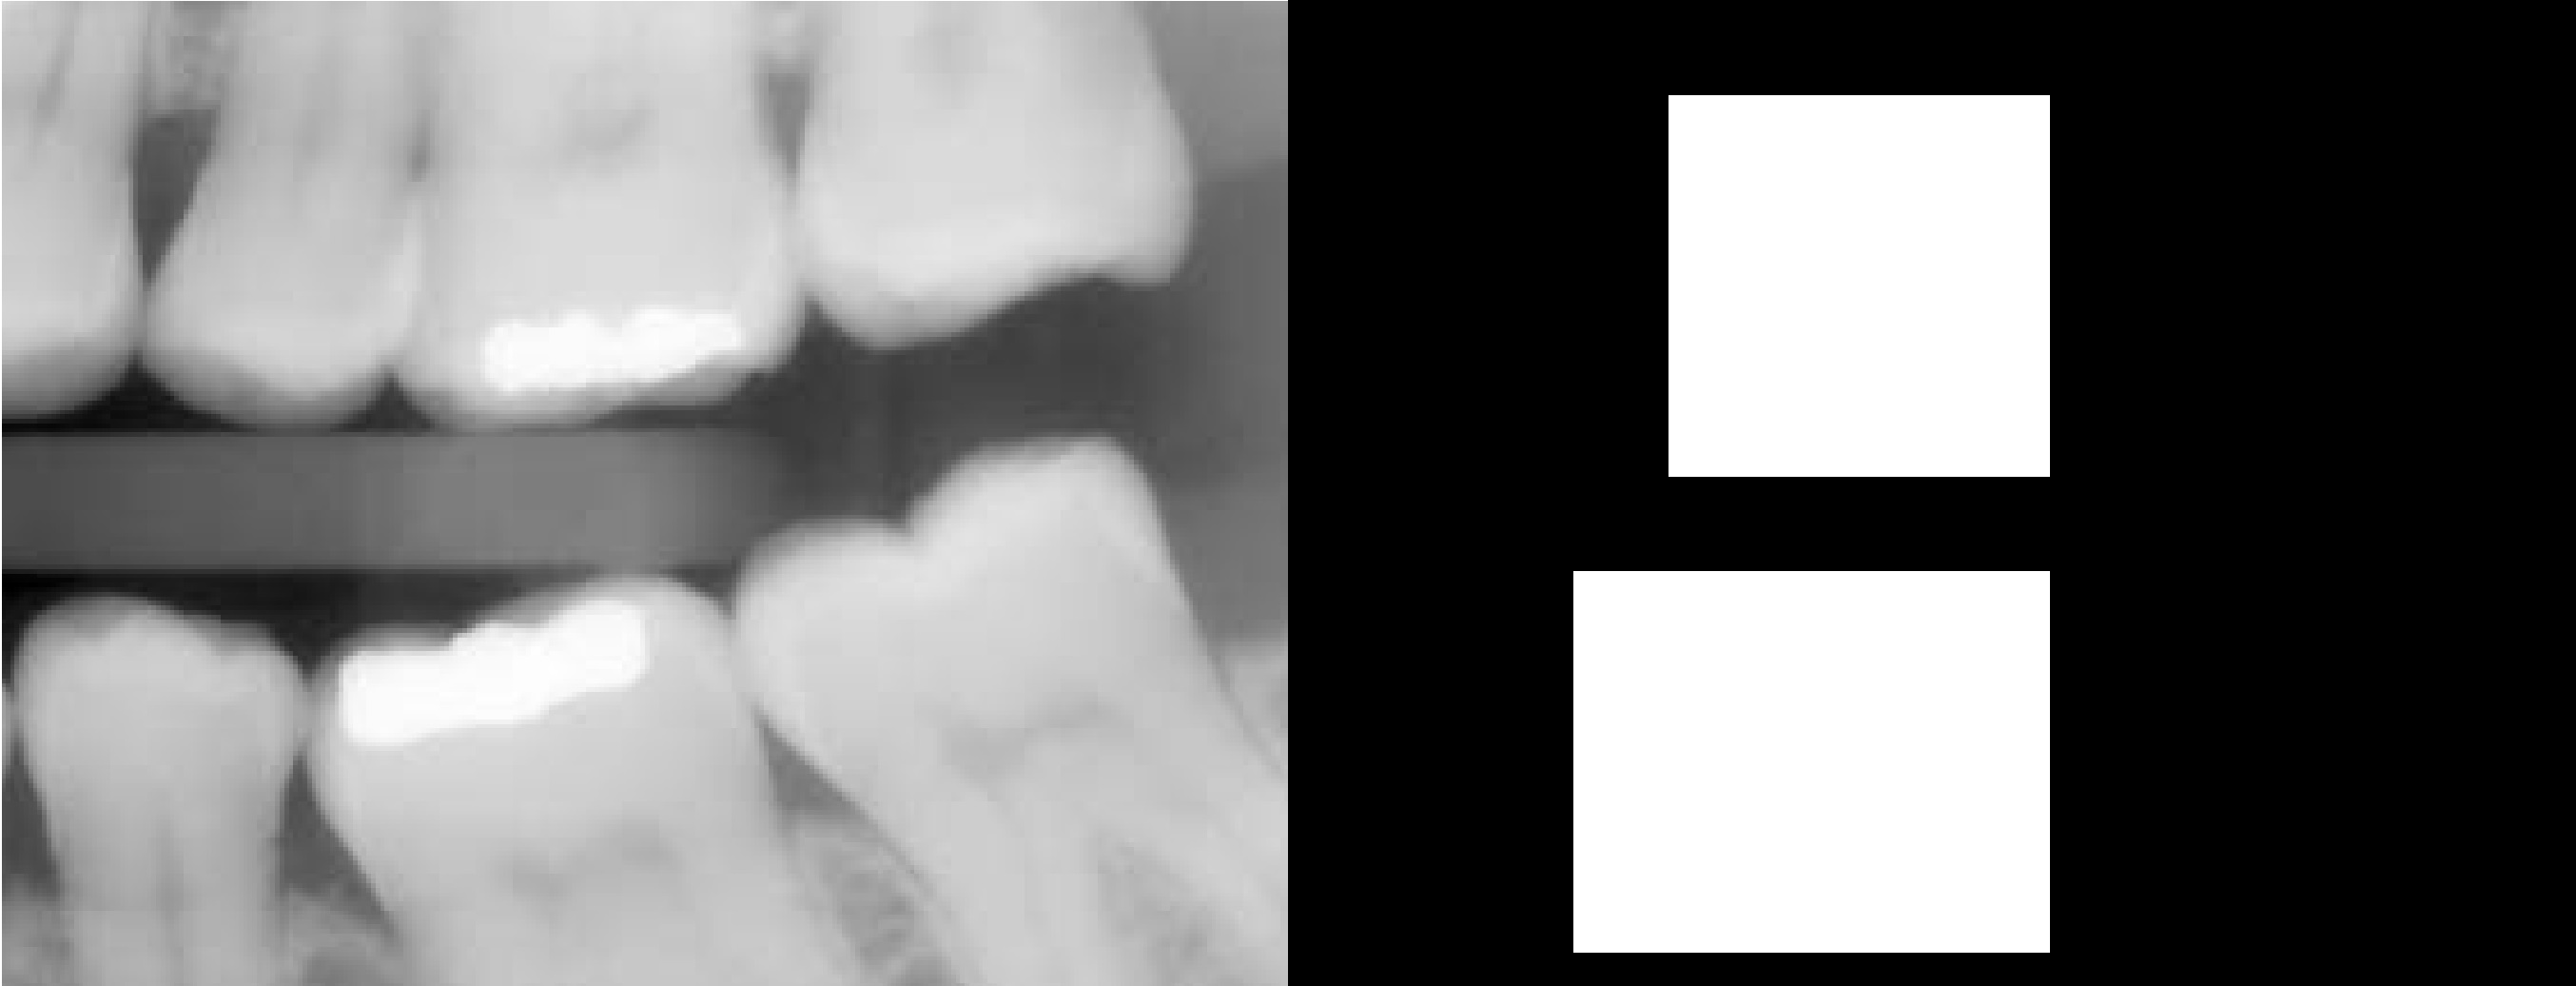

Image output; 


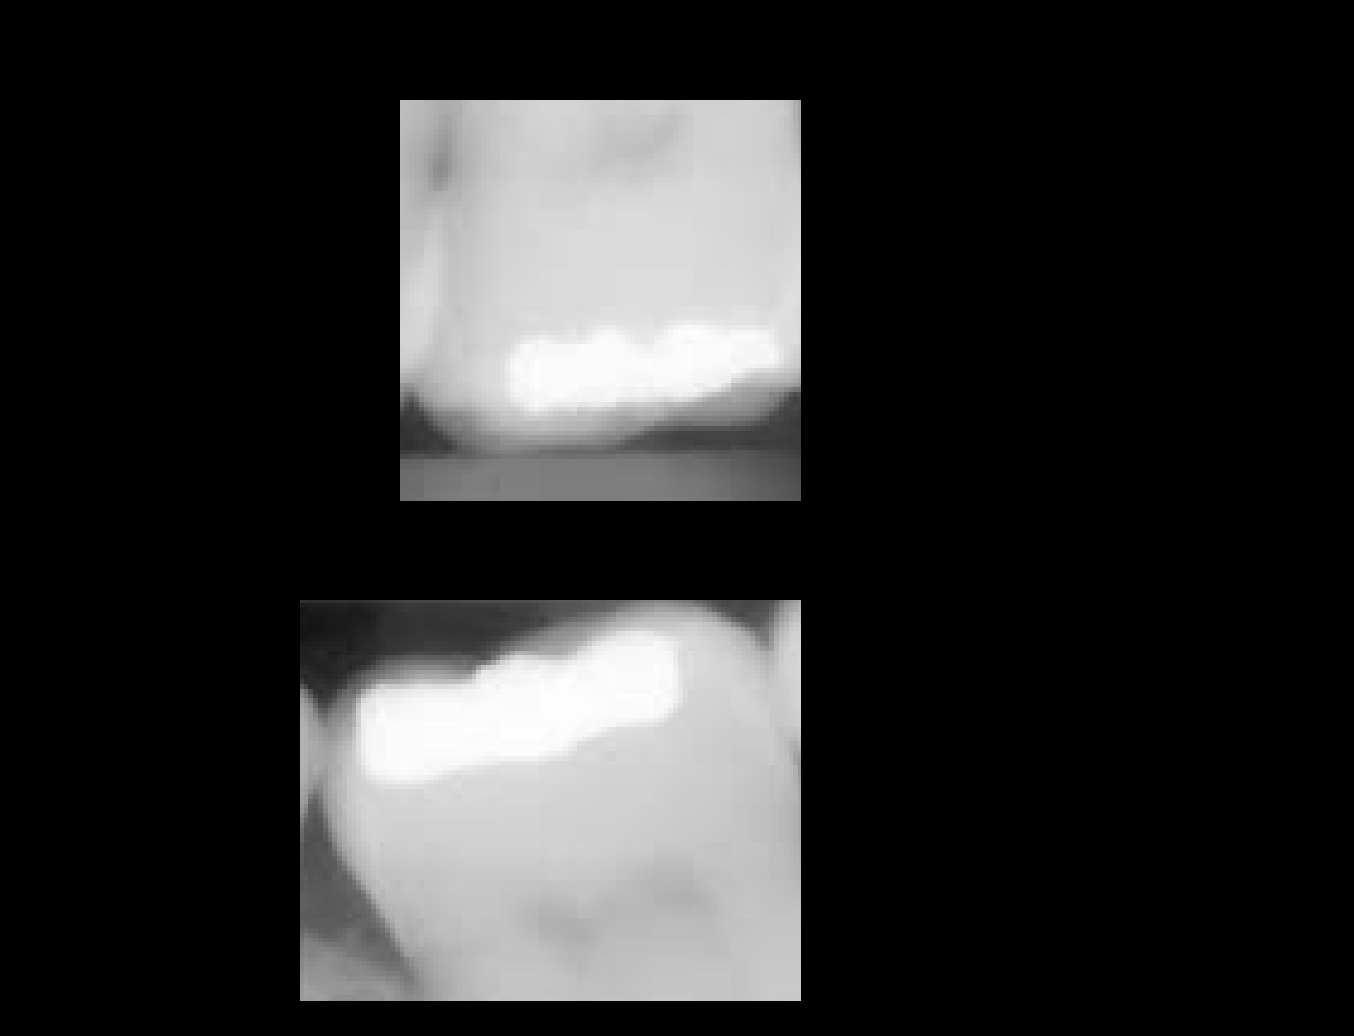

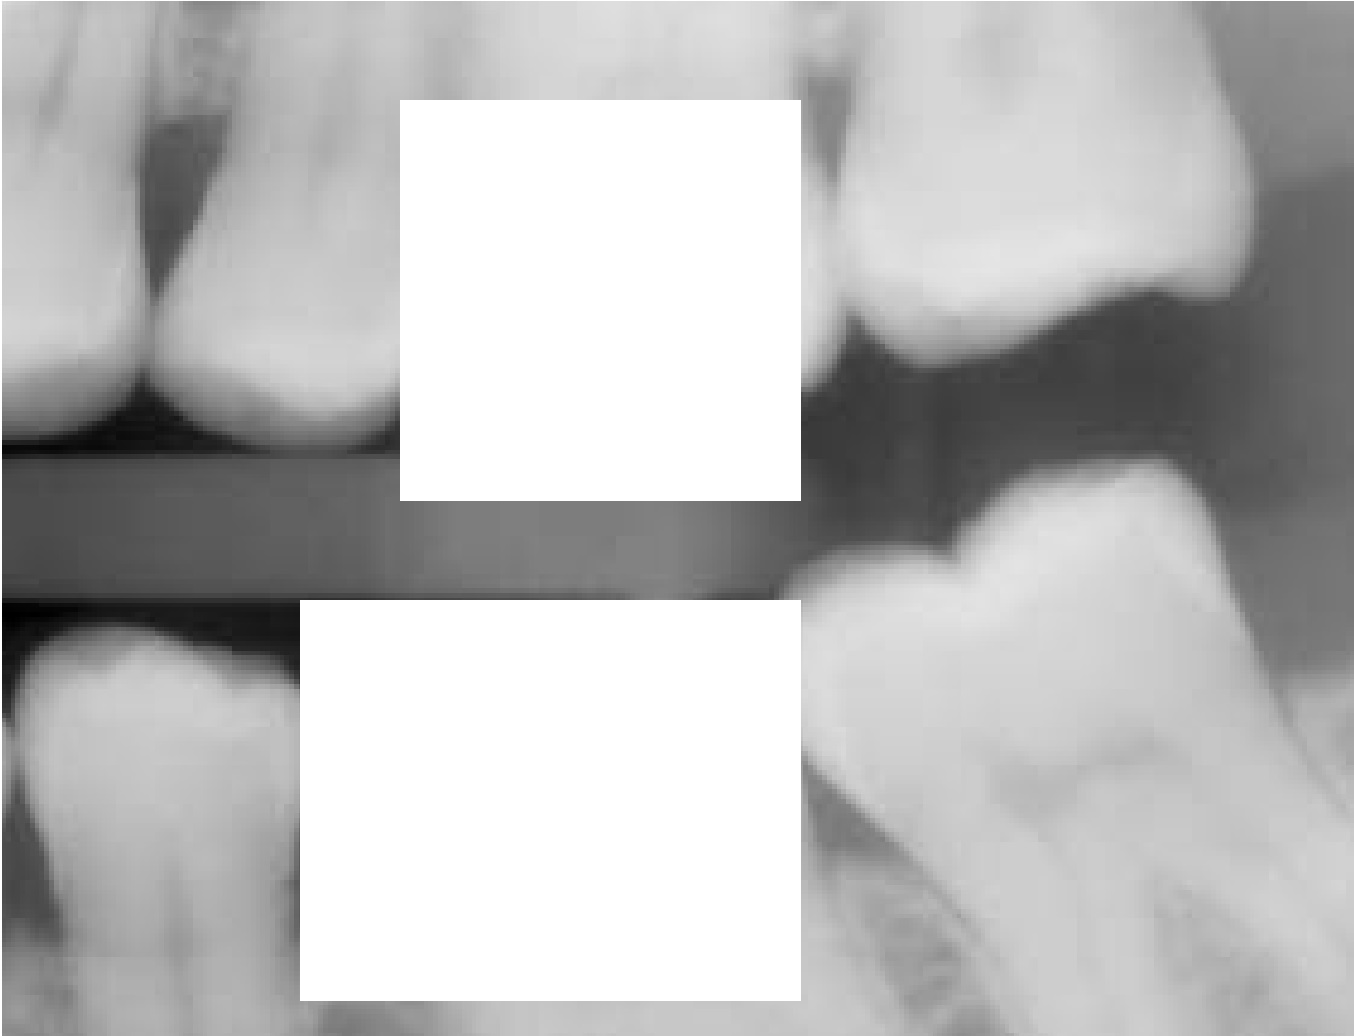

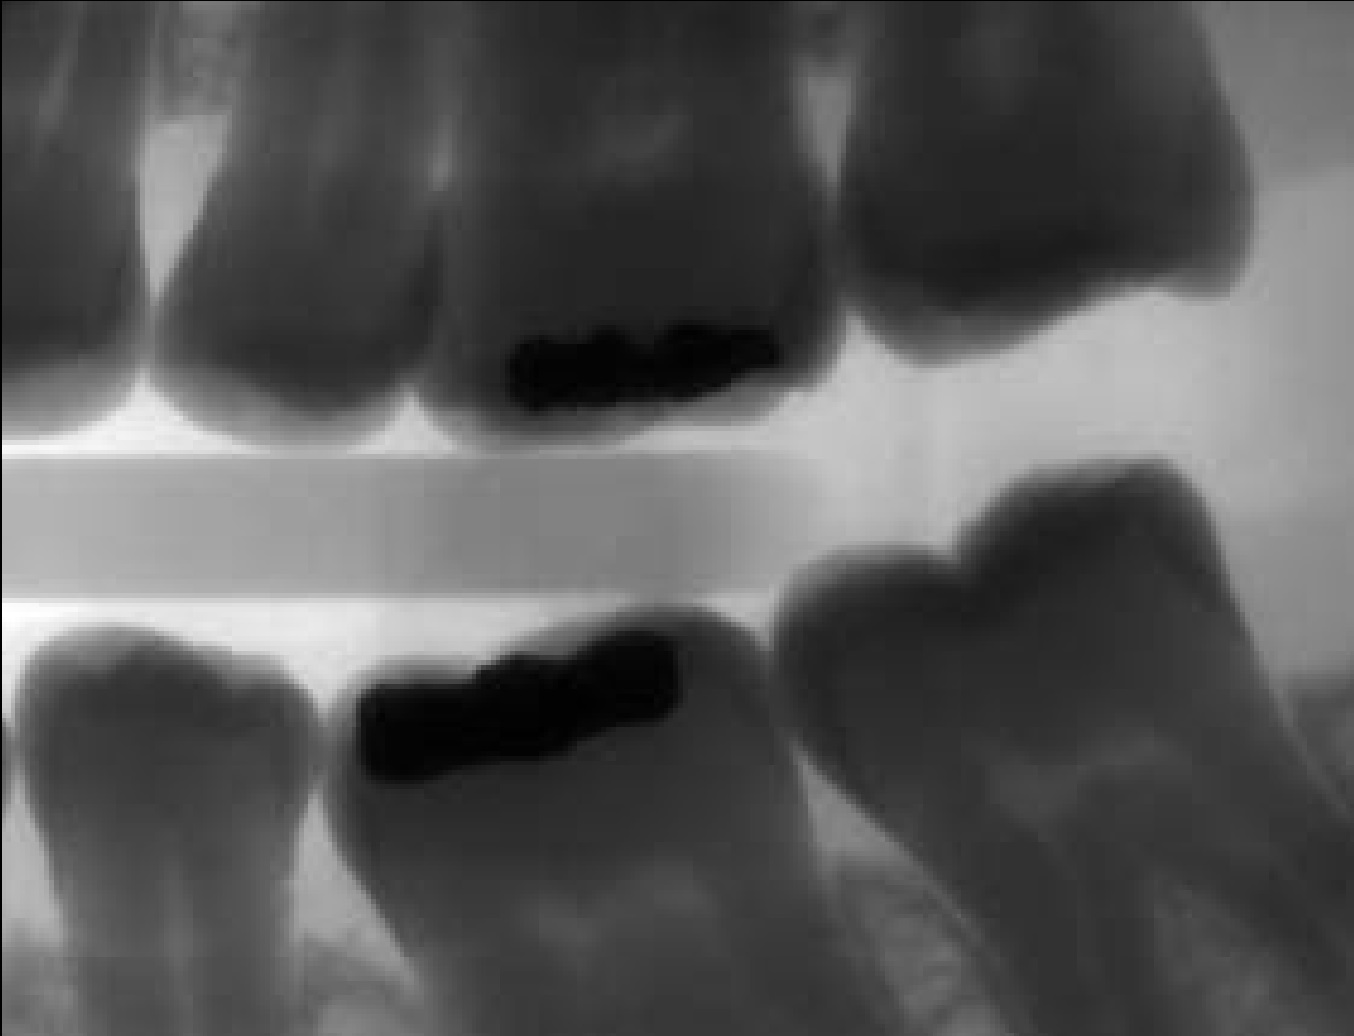

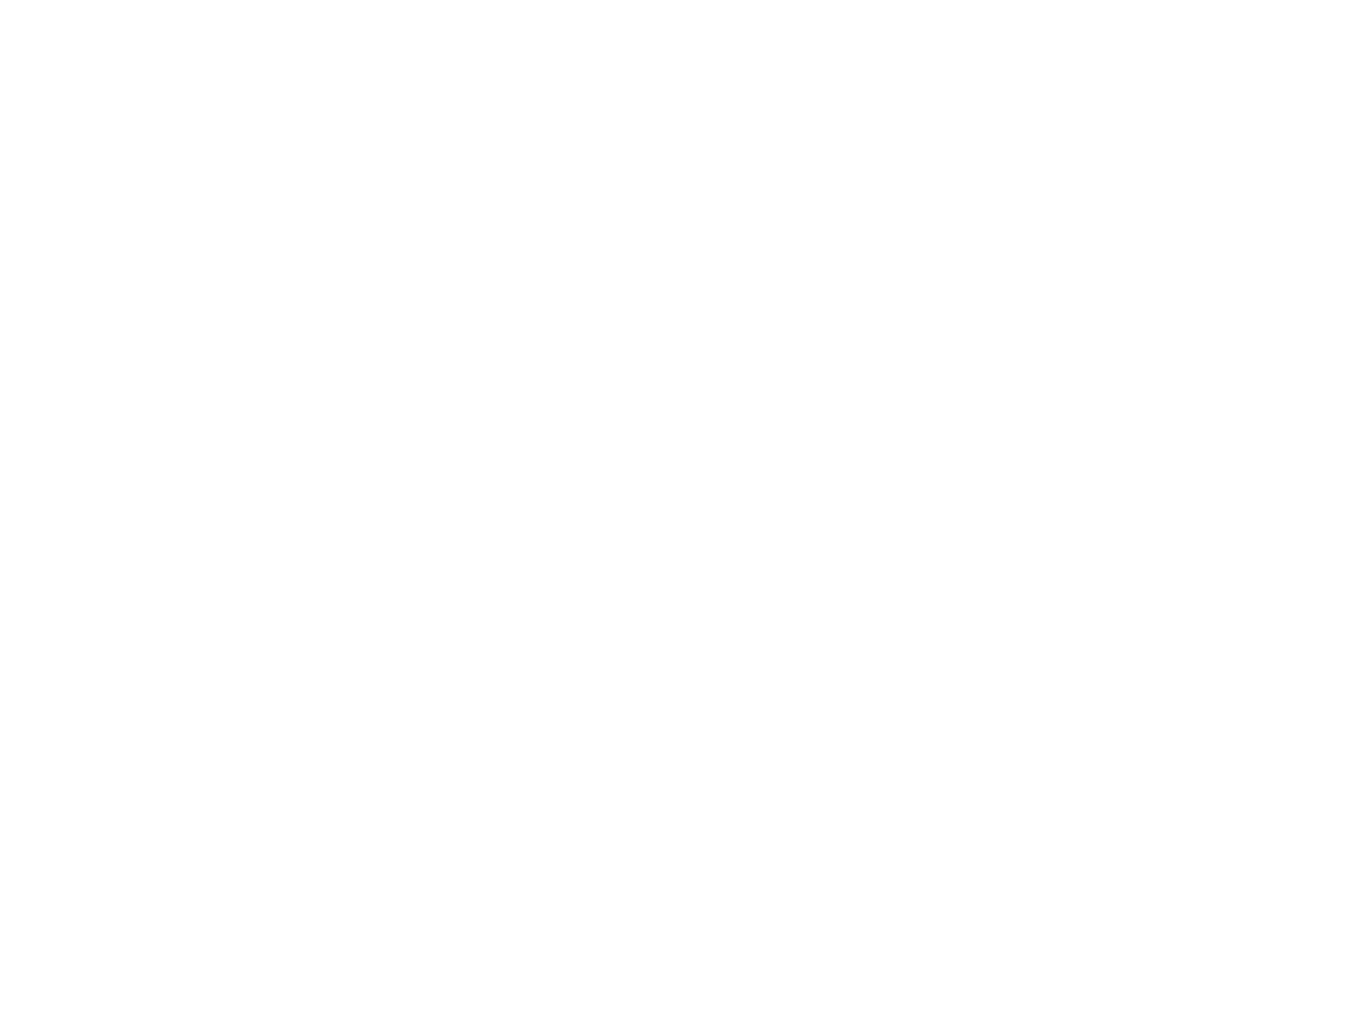

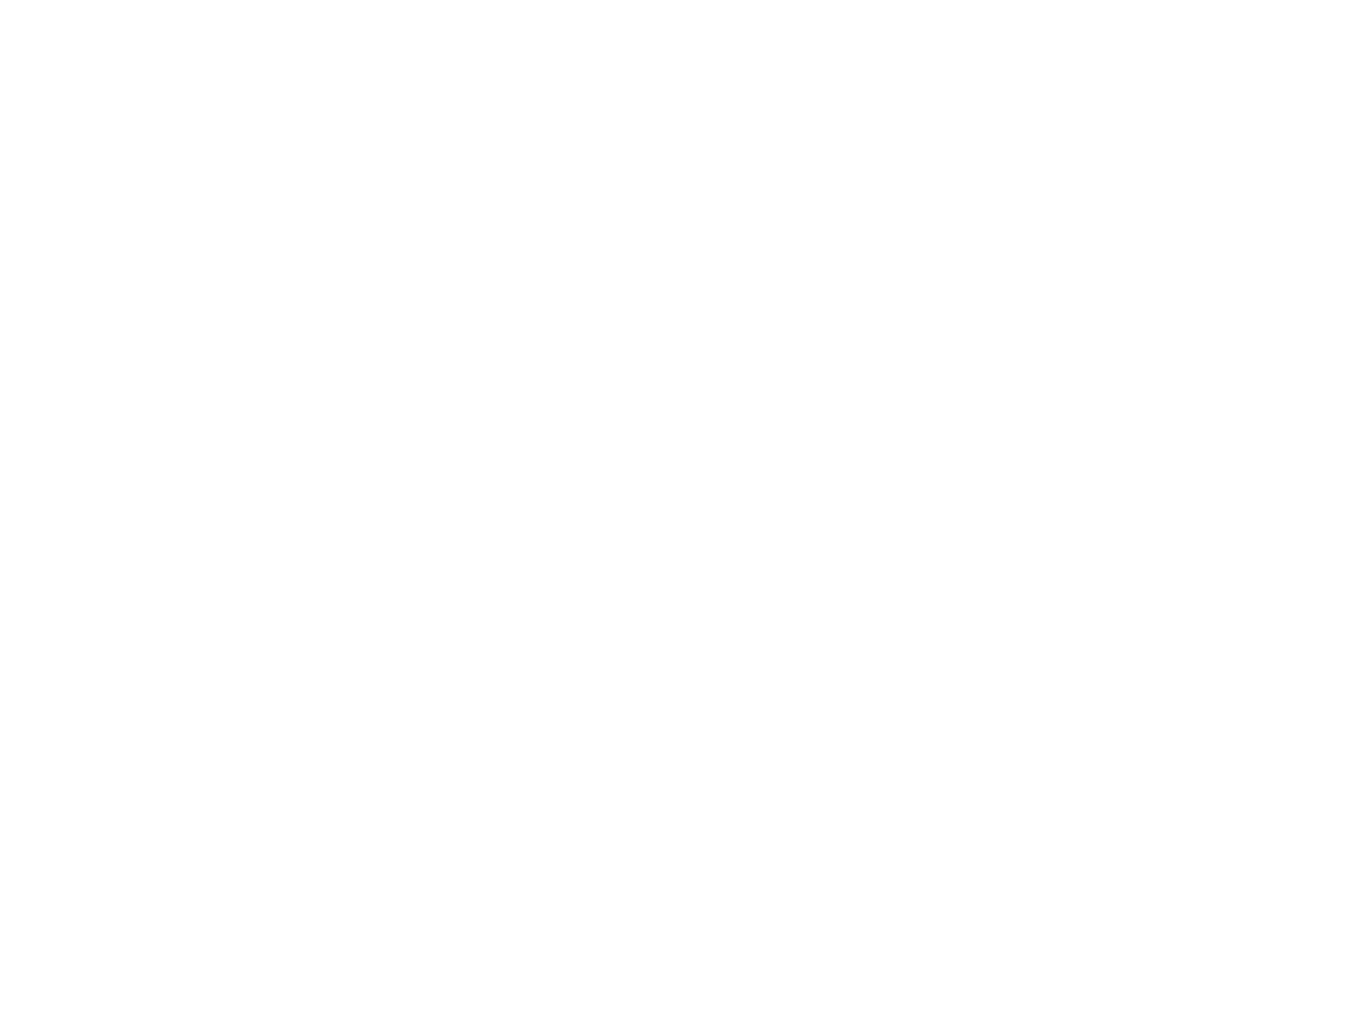

In [49]:
img = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')

black = np.zeros(img.shape, img.dtype)
mask = cv.rectangle(black, (400,100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300,600), (800,1000), [255,255,255], cv.FILLED)

print('image input: ')
frame = cv.hconcat((img, mask))

cv2_imshow(frame)

print('Image output; ')

masked_img_and = cv.bitwise_and(img,mask)
cv2_imshow(masked_img_and)

masked_img_or = cv.bitwise_or(img,mask)
cv2_imshow(masked_img_or)

masked_img_not = cv.bitwise_not(img,mask)
cv2_imshow(masked_img_not)

masked_img_nand = cv.bitwise_not(cv.bitwise_and(img,mask))
cv2_imshow(masked_img_nand)

masked_img_xor = cv.bitwise_xor(img,mask)
cv2_imshow(masked_img_xor)